In [1]:
import collections
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import rich
from tqdm import tqdm

import datagen
import our_tokenizer

/home/mila/g/gagnonju/.main/lib/python3.9/site-packages/beartype/_util/hint/pep/utilpeptest.py:317: BeartypeDecorHintPep585DeprecationWarning: PEP 484 type hint typing.Tuple[numpy.ndarray, numpy.ndarray] deprecated by PEP 585 scheduled for removal in the first Python version released after October 5th, 2025. To resolve this, import this hint from "beartype.typing" rather than "typing". See this discussion for further details and alternatives:
    https://github.com/beartype/beartype#pep-585-deprecations
  warn(


In [10]:
DATA_DIR = Path.cwd() / "data" 
print(sorted([x.name for x in DATA_DIR.iterdir()], key=lambda x: x.rsplit(".", 1)[-1]))

['false', '160_4_8.json.pkl', '88_4_3.json.pkl']


In [3]:
FILE_NAME = "160_8.json.pkl"

In [4]:
def is_sorted(l):
    return all(l[i] <= l[i + 1] for i in tqdm(range(len(l) - 1)))

def plot_lengths(lengths, x_subdiv=1):
    print("Checking if lengths are sorted...")
    assert is_sorted(lengths)
    print("Plotting...")
    plt.figure(figsize=(10, 10))
    plt.xticks(np.arange(int(np.ceil((np.max(lengths) + 1) / x_subdiv))) * x_subdiv)
    plt.yticks(np.linspace(0, 1, 21))
    plt.plot(lengths, np.linspace(0, 1, len(lengths)))
    plt.show()

In [5]:
tokenizer = our_tokenizer.Tokenizer(512, use_equal_symbol=True)

data, config = datagen.load_dataset(None, DATA_DIR / FILE_NAME)
all_splits = sum(data.values(), [])
all_levels = sum(all_splits, [])
all_nodes = list(datagen.multiple_get_all_desc(all_levels))
all_value_lens = [len(tokenizer(v.get_value(), return_tensors=None, no_eos=True)) for v in tqdm(all_nodes, desc="all value lens")]
all_value_lens.sort()
all_oracle_lens = [len(tokenizer(v.get_oracle_str()[0], return_tensors=None, no_eos=True)) for v in tqdm(all_nodes, desc="all oracle lens")]
all_oracle_lens.sort()

Loading data file.

Loading data file /home/mila/g/gagnonju/SelfLearnedExplanations/data/160_8.json.pkl

Done loading file.

Inverting dict
Dict inverted
Building nodes


all oracle lens: 100%|██████████| 33147576/33147576 [02:00<00:00, 274913.71it/s]


Checking if lengths are sorted...
Plotting...


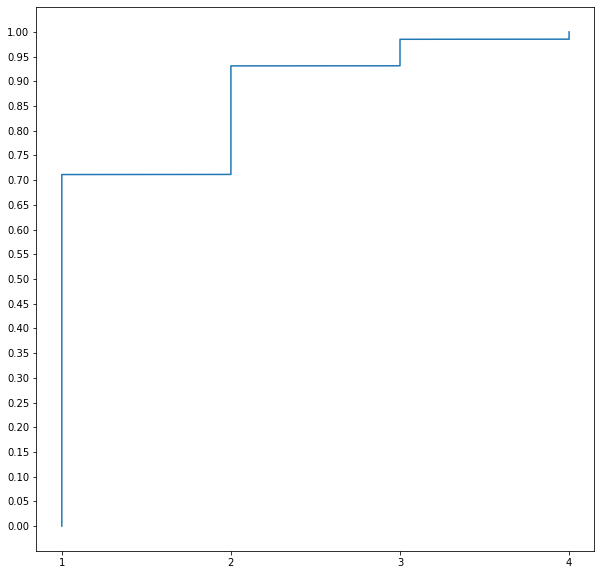

In [6]:
plot_lengths(all_value_lens)

Checking if lengths are sorted...
Plotting...


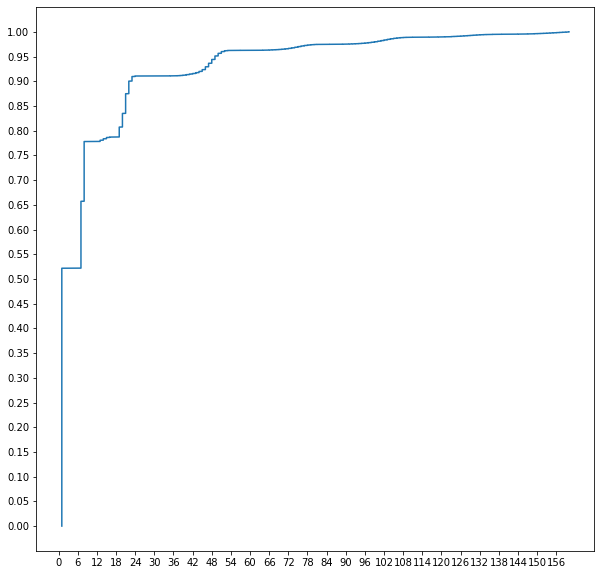

In [9]:
plot_lengths(all_oracle_lens, 6)

[(i, f"{np.mean(l <= i):0.3%}") for i in range(9)]

def get_max_equals(root: datagen.Node):
    """
    If a node has children then it has an equal sign
    """
    qty = 0
    children_nodes = root.get_children()
    if children_nodes:
        qty += 1
        qty += sum([get_max_equals(x) for x in children_nodes])
    return qty

print(sorted(collections.Counter(get_max_equals(x) for x in all_data).items(), key=lambda x: x[1], reverse=True))
    

longuest_generation = max(all_data, key=lambda x: len(str(x.get_oracle_str()[0])))

lengths = [len(x.get_oracle_str()[0]) for x in tqdm(all_data)]
oracle_str_lengths = np.array(lengths)
print("sorting")
oracle_str_lengths.sort()


[(i, f"{np.mean(oracle_str_lengths <= x):0.3%}") for i, x in enumerate(tqdm(range(88)))]